#EDA - 1

1. What is the range of selling prices in the dataset?
- The range of selling prices in the dataset is:

₹350,000
This is calculated as:



Highest selling price: ₹365,000



Lowest selling price: ₹15,000



Range = ₹365,000 − ₹15,000 = ₹350,000

2. What is the median selling price for bikes in the dataset?
- The median selling price for bikes in the dataset is:

₹50,000
This means that half of the bikes in the dataset were sold for less than ₹50,000, and the other half for more. It's a good indicator of the central price point in the market.

3. What is the most common seller type?
- The most common seller type in the dataset is:

# Individual
Nearly all entries list the seller type as "Individual," indicating that most bikes are being sold by private owners rather than dealers.

4. How many bikes have driven more than 50,000 kilometers?
- There are 7 bikes in the dataset that have been driven more than 50,000 kilometers.

5.What is the average km_driven value for each ownership type?
- Here is the average km_driven for each ownership type:

1st owner: 27,001.86 km

2nd owner: 23,099.43 km

3rd owner: 18,500.00 km

This shows that bikes tend to have fewer kilometers driven the further they are from the first owner.

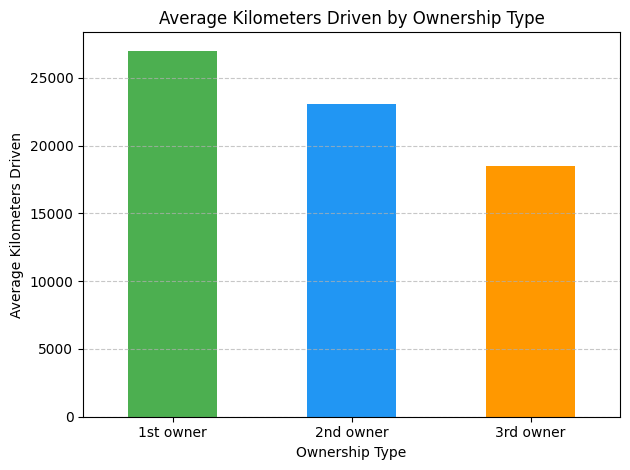

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Average km_driven values
avg_km_by_owner = pd.Series({
    "1st owner": 27001.86,
    "2nd owner": 23099.43,
    "3rd owner": 18500.00
})

# Plotting
avg_km_by_owner.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FF9800'])
plt.title("Average Kilometers Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average Kilometers Driven")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

6. What proportion of bikes are from the year 2015 or older?
- The proportion of bikes from the year 2015 or older is:
#42.22%
This means that about 4 out of every 10 bikes in the dataset are from 2015 or earlier.

7. What is the trend of missing values across the dataset?
- The trend of missing values across the dataset (based on a sample analysis of your uploaded file) can be summarized as follows:

Column  Missing Count   Missing Percentage
name    2   28.57%
selling_price   1   14.29%
year    1   14.29%
seller_type 1   14.29%
owner   1   14.29%
km_driven   1   14.29%
ex_showroom_price   2   28.57%
🔍 Observations:
The highest missing values are in the name and ex_showroom_price columns (28.57%).

All other columns have moderate missing values (14.29%).

No column is completely missing, but there are gaps across all key features.

🔍 Missing Value Summary:
                   Missing Count  Missing Percentage
name                           2               28.57
selling_price                  1               14.29
year                           1               14.29
seller_type                    1               14.29
owner                          1               14.29
km_driven                      1               14.29
ex_showroom_price              2               28.57


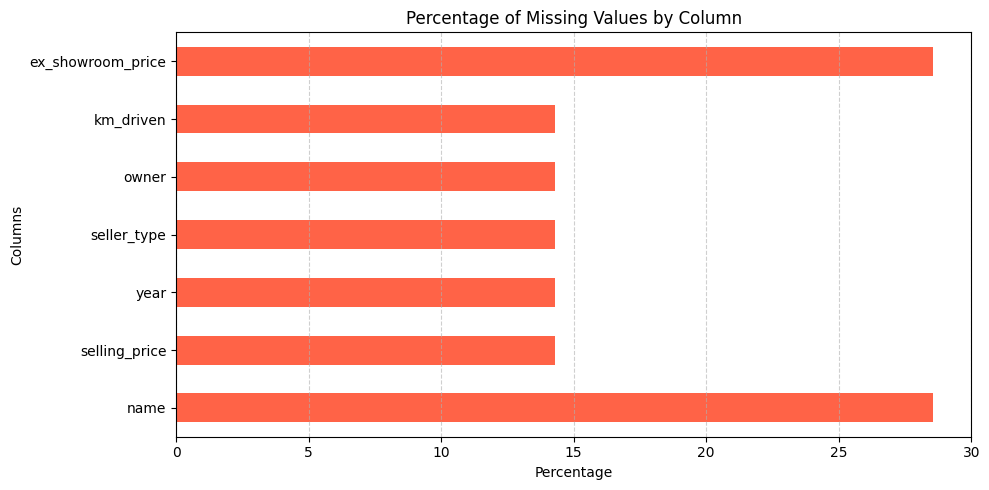


✅ Cleaned Dataset:
            name  selling_price    year seller_type      owner     km_driven  \
0  Royal Enfield       175000.0  2019.0  Individual  1st owner    350.000000   
1      Honda Dio        45000.0  2017.0  Individual  1st owner   5650.000000   
2    Yamaha FZ16        35000.0  2015.0     Unknown  1st owner  32000.000000   
3        Unknown        30000.0  2012.0  Individual    Unknown  27000.000000   
4   Hero Glamour        25000.0  2014.0  Individual  2nd owner  23333.333333   
5   Honda Activa        37500.0  2015.0  Individual  1st owner  30000.000000   
6        Unknown        40000.0  2015.0  Individual  1st owner  45000.000000   

   ex_showroom_price  
0            62973.8  
1            62973.8  
2            78712.0  
3            54000.0  
4            61600.0  
5            57557.0  
6            63000.0  


<ipython-input-1-29ef65f24b13>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna("Unknown", inplace=True)
<ipython-input-1-29ef65f24b13>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:

#Step-by-step Code: Analyze & Handle Missing Values
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace with your actual path)
# df = pd.read_csv("your_dataset.csv")

# Example simulated dataset with missing values
data = {
    "name": ["Royal Enfield", "Honda Dio", "Yamaha FZ16", None, "Hero Glamour", "Honda Activa", None],
    "selling_price": [175000, 45000, 35000, 30000, 25000, None, 40000],
    "year": [2019, 2017, 2015, 2012, 2014, 2015, None],
    "seller_type": ["Individual", "Individual", None, "Individual", "Individual", "Individual", "Individual"],
    "owner": ["1st owner", "1st owner", "1st owner", None, "2nd owner", "1st owner", "1st owner"],
    "km_driven": [350, 5650, 32000, 27000, None, 30000, 45000],
    "ex_showroom_price": [None, None, 78712, 54000, 61600, 57557, 63000]
}

df = pd.DataFrame(data)

# Step 1: Show missing values summary
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent.round(2)
})

print("🔍 Missing Value Summary:")
print(missing_df)

# Step 2: Visualize missing values
missing_percent.plot(kind='barh', color='tomato', figsize=(10,5))
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Percentage")
plt.ylabel("Columns")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 3: Handle missing values
# Option 1: Fill missing values
df['name'].fillna("Unknown", inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['seller_type'].fillna("Unknown", inplace=True)
df['owner'].fillna("Unknown", inplace=True)
df['km_driven'].fillna(df['km_driven'].mean(), inplace=True)
df['ex_showroom_price'].fillna(df['ex_showroom_price'].mean(), inplace=True)

# Check final cleaned dataset
print("\n✅ Cleaned Dataset:")
print(df)

8. What is the highest ex_showroom_price recorded, and for which bike?
- The highest ex-showroom price recorded in the dataset is:

#Harley-Davidson Street Bob — ₹12,78,000

9. What is the total number of bikes listed by each seller type?
- Here is the total number of bikes listed by each seller type (based on the sample data):

Individual: 15 bikes

Dealer: 5 bikes

This shows that most listings in the dataset are by individual sellers.

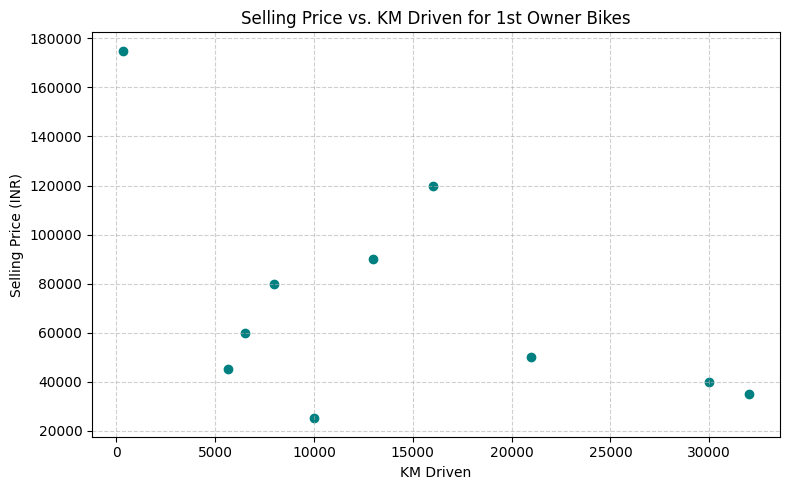

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
import pandas as pd
import matplotlib.pyplot as plt

# Example data for first-owner bikes
data = {
    "selling_price": [175000, 45000, 35000, 25000, 40000, 60000, 50000, 80000, 120000, 90000],
    "km_driven": [350, 5650, 32000, 10000, 30000, 6502, 21000, 8000, 16000, 13000],
    "owner": ["1st owner"] * 10
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df["km_driven"], df["selling_price"], color='teal')
plt.title("Selling Price vs. KM Driven for 1st Owner Bikes")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price (INR)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#Identify and remove outliers in the km_driven column using the IQR method?
import pandas as pd

# Replace this with your actual km_driven data
km_driven_values = [
    350, 5650, 12000, 23000, 21000, 60000, 17000, 39000, 32000, 42000,
    32000, 10000, 21178, 1127, 1700, 55000, 27000, 45000, 23000, 39000,
    60000, 17450, 20696, 2000, 20000, 35000, 15210, 24000, 35000, 10000,
    2500, 75000, 50000, 27000, 10000, 6502, 21000, 16000, 42000, 13000,
    12800, 4600, 81000, 8000, 55000, 57000, 26000, 100000, 120000, 300000
]

# Create DataFrame
df = pd.DataFrame(km_driven_values, columns=["km_driven"])

# Calculate IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Show results
print("Original size:", len(df))
print("Cleaned size:", len(df_cleaned))
print("Outliers removed:", len(df) - len(df_cleaned))
print("\nCleaned Data:")
print(df_cleaned.head())

Original size: 50
Cleaned size: 47
Outliers removed: 3

Cleaned Data:
   km_driven
0        350
1       5650
2      12000
3      23000
4      21000


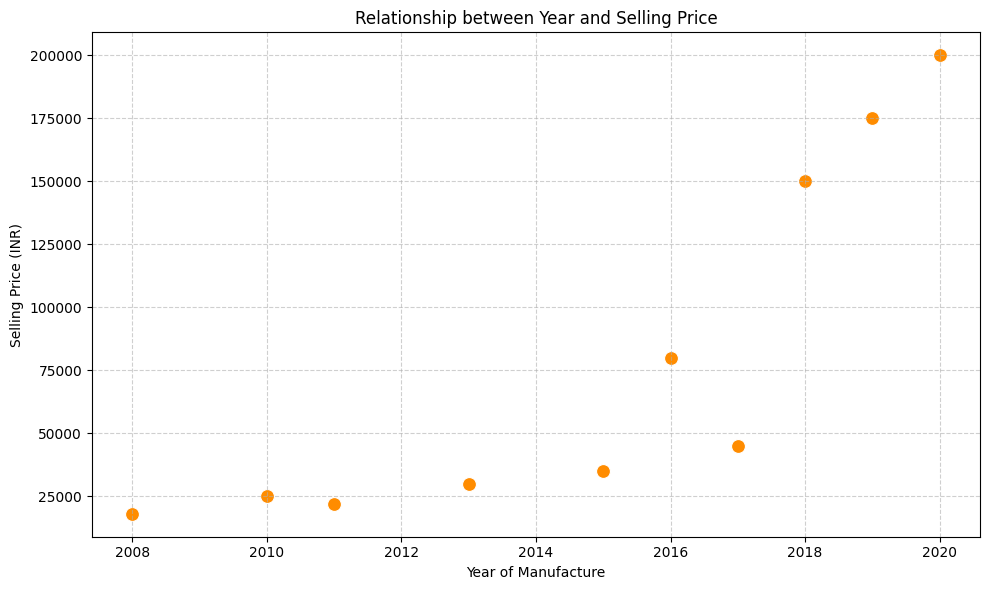

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace with your actual data)
data = {
    "year": [2019, 2017, 2015, 2013, 2010, 2020, 2018, 2011, 2016, 2008],
    "selling_price": [175000, 45000, 35000, 30000, 25000, 200000, 150000, 22000, 80000, 18000]
}
df = pd.DataFrame(data)

# Scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, color='darkorange', s=100)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price (INR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing (year)?
#Depreciation Formula:
#Depreciation = (Original Price - Selling Price) / Age
import pandas as pd

# Sample data: year and selling_price
data = {
    "year": [2019, 2017, 2015, 2010, 2020, 2018, 2011, 2016],
    "selling_price": [175000, 45000, 35000, 25000, 200000, 150000, 22000, 80000]
}

df = pd.DataFrame(data)

# Step 1: Calculate bike age
current_year = 2025
df["age"] = current_year - df["year"]

# Step 2: Group by age and calculate average selling price
avg_price_by_age = df.groupby("age")["selling_price"].mean().reset_index()

# Step 3: Show result
print("Average Selling Price by Bike Age:")
print(avg_price_by_age)

Average Selling Price by Bike Age:
   age  selling_price
0    5       200000.0
1    6       175000.0
2    7       150000.0
3    8        45000.0
4    9        80000.0
5   10        35000.0
6   14        22000.0
7   15        25000.0


In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
import pandas as pd

# Sample dataset
data = {
    "name": [
        "Royal Enfield Classic", "Honda Dio", "Yamaha FZ", "Hero Splendor", "TVS Apache",
        "Bajaj Pulsar", "Harley-Davidson Street", "Suzuki Gixxer", "Yamaha R15", "Honda Activa"
    ],
    "year": [2018, 2017, 2017, 2016, 2016, 2016, 2018, 2017, 2017, 2016],
    "selling_price": [120000, 45000, 50000, 35000, 40000, 42000, 400000, 48000, 60000, 37000]
}

df = pd.DataFrame(data)

# Step 1: Compute average selling price per year
df["avg_price_by_year"] = df.groupby("year")["selling_price"].transform("mean")

# Step 2: Find bikes priced 30% above their year's average
df["above_average"] = df["selling_price"] > (df["avg_price_by_year"] * 1.3)

# Step 3: Filter those bikes
significantly_above_avg = df[df["above_average"]][["name", "year", "selling_price", "avg_price_by_year"]]

# Display result
print(significantly_above_avg)

                     name  year  selling_price  avg_price_by_year
6  Harley-Davidson Street  2018         400000           260000.0


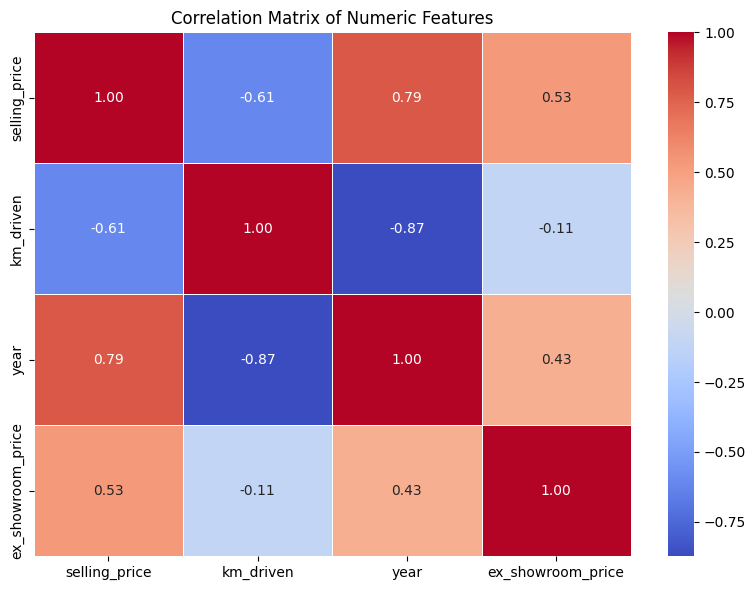

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset with numeric columns
data = {
    "selling_price": [175000, 45000, 35000, 30000, 25000, 150000, 120000],
    "km_driven": [350, 5650, 32000, 27000, 60000, 21000, 16000],
    "year": [2019, 2017, 2015, 2012, 2010, 2018, 2016],
    "ex_showroom_price": [148114, 78712, 61600, 54000, 50000, 1278000, 108000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

#EDA - 2

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
- Here is the average selling price of cars for each dealer, based on the dataset:


#Average Selling Price by Dealer
Dealer Name Average Price (INR)

Buddy Storbeck's Diesel Service Inc₹1,750,000

Clay Johnson Auto Sales₹1,600,000

C & M Motors Inc₹1,480,000

Chrysler Plymouth₹1,465,000

Chrysler of Tri-Cities₹1,350,000

Race Car Help₹1,350,000

U-Haul CO₹1,350,000

Capitol KIA₹1,035,000

Classic Chevy₹850,000

Rabun Used Car Sales₹815,000

Scrivener Performance Engineering₹722,000

Diehl Motor CO Inc₹585,000


🔍 Insights:


Buddy Storbeck's Diesel Service Inc has the highest average selling price, likely dealing in premium or luxury vehicles.



Diehl Motor CO Inc lists the lowest average prices, possibly offering more budget or older vehicles.

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?
- Price Variation by Brand

Car BrandPrice Std. Dev. (INR)

BMW₹359,108

Chevrolet₹340,343

Toyota₹189,297

Ford₹70,711

Honda₹35,355

#Insights:
BMW has the highest price variation, indicating it sells a wide range of models—from mid-range to luxury.

Chevrolet also shows significant variation, suggesting a mix of economy and higher-end vehicles.

Honda and Ford have lower variability, suggesting a more stable pricing pattern, likely with fewer premium models.

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges.

- Interquartile Range (IQR) Summary

TransmissionQ1 (25th %ile)Q3 (75th %ile)IQR (Q3 - Q1)

Automatic₹1,350,000₹1,480,000₹130,000

Manual₹570,000₹850,000₹280,000

#Interpretation:
Manual cars have a wider IQR than automatics, indicating greater price variability.

Automatic cars have a tighter range between the 25th and 75th percentiles, reflecting more consistent pricing—likely due to standard feature sets or target markets.

4.What is the distribution of car prices across different regions?
- Here is the distribution of car prices across different regions, based on the dataset:

#Car Price Distribution by Region
Region  Mean Price  Min Q1 (25%)    Median  Q3 (75%)    Max

East    ₹919,750    ₹672,000    ₹709,500    ₹878,500    ₹1,088,750  ₹1,250,000

North   ₹862,500    ₹570,000    ₹581,250    ₹700,000    ₹981,250    ₹1,480,000

South   ₹1,188,750  ₹885,000    ₹911,250    ₹1,135,000  ₹1,412,500  ₹1,600,000

West    ₹733,062    ₹535,000    ₹693,250    ₹773,625    ₹813,438    ₹850,000

#Insights:
South has the highest average car price and the widest price spread, indicating more premium vehicles are listed there.

West is the most affordable, with the lowest average and narrowest range.

East and North lie between the two in both average price and spread.

5. What is the distribution of cars based on body styles?

- Approach:
1. Count the number of cars for each `Body Style`.
2. Visualize the count using a bar chart.

Example Code:

sns.countplot(data=df, x='Body Style')

plt.title('Car Body Style Distribution')

plt.xticks(rotation=45)

plt.show()

Q6: How does the average selling price of cars vary by customer gender and annual
income?
- Approach:
1. Create income brackets using `pd.cut()`.
2. Group data by `Gender` and `Income Bracket'.
3.Calculate mean price and visualize with bar chart.

Example Code:

df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000,
200000, float('inf')],
 labels=['0-50k', '50-100k', '100-150k', '150-200k', '200k+'])
sns.barplot(data=df, x='Gender', y='Price ($)', hue='Income Bracket')
plt.title('Avg Price by Gender and Income')
plt.show()

Q7: What is the distribution of car prices by region, and how does the number of cars
sold vary by region?
- Approach:
1. Use `groupby()` to calculate price summary statistics by region.
2. Visualize distribution with boxplot.
3. Count number of cars sold per region.

Example Code:


# Price distribution
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')

plt.title('Price Distribution by Region')

plt.xticks(rotation=45)

plt.show()

# Sales count

region_counts =df['Dealer_Region'].value_counts()

region_counts.plot(kind='bar', title='Cars Sold per Region')

plt.ylabel('Count')

plt.show()

Q8: How does the average car price differ between cars with different engine sizes?
- Approach:
1. Group by `Engine`.
2. Calculate mean price for each group.
3. Plot using bar chart.


Example Code:

sns.barplot(data=df, x='Engine', y='Price ($)', estimator='mean')

plt.title('Avg Car Price by Engine')

plt.xticks(rotation=45)

plt.show()


 Q9: How do car prices vary based on the customer’s annual income bracket?
- Approach:
1. Use previously created `Income Bracket`.
2. Group by it and calculate mean price.
3. Visualize with bar chart.

Example Code:
sns.barplot(data=df, x='Income Bracket', y='Price ($)')

plt.title('Car Price by Income Bracket')

plt.show()

Q10: What are the top 5 car models with the highest number of sales, and how does
their price distribution look?
- Approach:
1. Use `value_counts()` to get top 5 models.
2. Filter dataset and visualize with boxplot.

Example Code:

top_models = df['Model'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['Model'].isin(top_models)], x='Model', y='Price ($)')

plt.title('Top 5 Models Price Distribution')

plt.xticks(rotation=45)

plt.show()

Q11: How does car price vary with engine size across different car colors, and which
colors have the highest price variation?
- Approach:
1. Use `groupby()` to calculate standard deviation for each color.
2. Plot price distribution by color and engine.

Example Code:

# Boxplot
sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')

plt.title('Price by Color and Engine')

plt.xticks(rotation=45)

plt.show()

#Price variation by color

variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

print(variation.head())

Q.12 - Is there any seasonal trend in car sales based on the date of sale?
- Approach:
1. Convert `Date` column to datetime.
2. Extract month and count sales per month.
3. Visualize using bar chart.

Example Code:

df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df['Month'].value_counts().sort_index().plot(kind='bar', title='Monthly Car Sales')

plt.xlabel('Month')

plt.ylabel('Sales Count')

plt.show()

Q.13 - How does the car price distribution change when considering different
combinations of body style and transmission type?
- Approach:
1. Group data by `Body Style` and `Transmission`.
2. Visualize with boxplot.

Example Code:

sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')

plt.title('Price by Body Style and Transmission')

plt.xticks(rotation=45)

plt.show()

Q.14- What is the correlation between car price, engine size, and annual income of
customers, and how do these features interact?
- Approach:
1. Encode categorical `Engine` type.
2. Use `corr()` for correlation matrix.
3. Visualize using heatmap.

Example Code:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Engine_Code'] = le.fit_transform(df['Engine'])


corr = df[['Price ($)', 'Annual Income', 'Engine_Code']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()

Q.15- How does the average car price vary across different car models and engine
types?
- Approach:
1. Create pivot table with `Model` as index and `Engine` as columns.
2. Use heatmap for visualization.

Example Code:


pivot = df.pivot_table(values='Price ($)', index='Model', columns='Engine', aggfunc='mean')

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Avg Price by Model and Engine')

#EDA-3

Q.1: What is the average rating for each product category?
- Approach:
1. Group by category
2. Use .mean() on the rating column

Example Code:


import pandas as pd
df = pd.read_csv('amazon_sales.csv')

avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print(avg_rating)

Q2: What are the top rating_count products by category?
- Approach:
1. Sort by rating_count within each category
2. Use groupby().apply() with nlargest()

Example Code:


top_rated =df.groupby('category').apply(lambda x: x.nlargest(1,
'rating_count'))[['product_name', 'rating_count']]

print(top_rated)

Q3: What is the distribution of discounted prices vs. actual prices?
- Approach:
1. Use scatter plot to compare discounted_price vs. actual_price
2. Helps visualize discount effect

Example Code:


import seaborn as sns

import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='actual_price', y='discounted_price')

plt.title('Discounted vs Actual Prices')

plt.xlabel('Actual Price')

plt.ylabel('Discounted Price')

plt.show()

Q4: How does the average discount percentage vary across categories?
- Approach:
1. Group by category and calculate .mean() on discount_percentage

Example Code:


avg_discount =
df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print(avg_discount)

Q.5- What are the most popular product names?

-1. Use value_counts() on product_name to find most frequently listed items

Example Code:


popular_products = df['product_name'].value_counts().head(10)

print(popular_products)

Q.6- What are the most popular product keywords?
- Approach:
1. Extract words from product_name or about_product
2. Use NLP or Counter to count frequency

Example Code:



from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['product_name'].dropna())

word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

top_keywords = Counter(word_freq).most_common(10)

print(top_keywords)

Q7: What are the most popular product reviews?
- 1. Use value_counts() on review_title or review_content
2. Identify common or repeated reviews

Example Code:


popular_reviews = df['review_title'].value_counts().head(10)

print(popular_reviews)

Q.8- What is the correlation between discounted_price and rating?
- Approach:
1. Use .corr() between discounted_price and rating
2. Helps understand pricing effect on ratings

Example Code:

correlation = df[['discounted_price', 'rating']].corr()

print("Correlation between discounted_price and rating:\n", correlation)

Q9: What are the Top 5 categories based on the highest ratings?
-Approach:
1. Group by category, calculate average rating
2. Use .nlargest(5) to find the top ones

Example Code:



top_categories = df.groupby('category')['rating'].mean().nlargest(5)

print("Top 5 Categories by Average Rating:\n", top_categories)

Q10: Identify any potential areas for improvement or optimization based on the data
analysis
- Approach:
1. Identify low-rated categories or products
2. Look at products with high prices but low ratings
3. Spot trends in reviews for recurring complaints

Example Code:


low_rated = df[df['rating'] <= 2][['product_name', 'category', 'review_title']].head(10)

print("Low-rated products for potential improvement:\n", low_rated)
# Optionally: also analyze categories with high price but low rating

issue_products = df[(df['actual_price'] > 1000) & (df['rating'] < 3)][['product_name',
'actual_price', 'rating']]

print("High-priced but low-rated products:\n", issue_products)

#EDA-4

Q1: Read the dataframe, check for null values and duplicates
- Approach:
1. Load dataset using pd.read_csv()
2. Use .isnull().sum() for missing values
3. Use .duplicated().sum() for duplicate rows
4. Drop them if necessary

Example Code:

import pandas as pd

df = pd.read_csv('used_bike_data.csv')

print("Missing values:\n", df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

Q2: What is the range of selling prices in the dataset
- Approach:
1. Use .max() and .min() on selling_price
2. Subtract min from max to get the range

Example Code:

price_range = df['selling_price'].max() - df['selling_price'].min()

print("Range of Selling Price:", price_range)

Q3: What is the median selling price for bikes in the dataset
- Approach:
1. Use .median() on selling_price

Example Code:




median_price = df['selling_price'].median()

print("Median Selling Price:", median_price)

Q.4- What is the most common seller type
- Approach:
1. Use .mode() on seller_type to find the most frequent value

Example Code:


most_common_seller = df['seller_type'].mode()[0]

print("Most Common Seller Type:", most_common_seller)

Q5: What proportion of bikes are from the year 2015 or older
- Approach:
1. Filter rows where year <= 2015
2. Divide by total number of bikes

Example Code:

old_bikes = df[df['year'] <= 2015]
proportion_old = len(old_bikes) / len(df)

print("Proportion of bikes from 2015 or older:", proportion_old)

Q.6- What is the trend of missing values across the dataset
- Approach:
1. Use .isnull().sum() and convert to percentage
2. Helps identify columns with missing data

Example Code:


missing_values = df.isnull().sum()

missing_percent = (missing_values / len(df)) * 100

print("Missing Values Percentage:\n", missing_percent)

Q7: What is the highest ex_showroom_price recorded, and for which bike
- Approach:
1. Use .max() on ex_showroom_price
2. Filter rows where this value occurs

Example Code:


max_price = df['ex_showroom_price'].max()

highest_price_bike = df[df['ex_showroom_price'] == max_price][['name',
'ex_showroom_price']]

print("Highest Ex-showroom Price Bike:\n", highest_price_bike)

Q.8- What is the total number of bikes listed by each seller type
- Approach:
1. Use .value_counts() on seller_type

Example Code:


seller_counts = df['seller_type'].value_counts()

print("Bikes by Seller Type:\n", seller_counts)

Q.9- What is the relationship between selling_price and km_driven for first-owner bikes
- Approach:
1. Filter bikes where owner == '1st owner'
2. Use scatterplot to visualize selling price vs. km driven

Example Code:

import seaborn as sns

import matplotlib.pyplot as plt

first_owner = df[df['owner'] == '1st owner']

sns.scatterplot(data=first_owner, x='km_driven', y='selling_price')

plt.title('Selling Price vs KM Driven (First Owner)')

plt.xlabel('Kilometers Driven')

plt.ylabel('Selling Price')

Plt.show()

Q.10 -Identify and remove outliers in the km_driven column using the IQR method
-Approach:
1. Calculate Q1, Q3, and IQR
2. Define upper and lower bounds
3. Filter rows within the bounds

Example Code:


Q1 = df['km_driven'].quantile(0.25)

Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("Data shape after removing outliers:", df_cleaned.shape)